We plan to use Python together with the libraries `numpy`, `scipy` and `matplotlib` for numerical, scientific calculations and plotting. Good use of these libraries will allow you to express yourself more concisely than you can using standard Python functionality. Here you will find relevant functionality and documentation in the libraries yourself. There are all good documents on the Internet, just google it.

In Jupyter Notebook and Jupyter Lab it is possible to use different *backends* for plotting with `matplotlib'.
These are clearly different underlying "engines" that determine the appearance and functionality of figures that produce.
Depending on which program you use, you will find that one backend works better than others.
In Jupyter Notebook the `notebook' backend works best and without the need to install additional software, but in Jupyter Lab the plugin [jupyter-matplotlib](https://github.com/matplotlib/jupyter-matplotlib) needs to be installed to get it optimal `widget` backend to work. Both programs also support the ``inline'' backend without the need for additional software, but this produces less flexible figures and should be used as a backup solution. Experiment with the backends suggested below to find the one that works best for you.

In [3]:
import scipy
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline
newparams = {'figure.figsize': (8, 5), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

## Brief about physical units in numerical calculations

In numerical calculations, we must take into account the limited precision and size of the floating point numbers that the computer uses to represent real numbers.
In quantum mechanics, we particularly often encounter Planck's reduced constant $\hbar \approx 6.63 \cdot 10^{-34} \text{ Js}$ and often the square $\hbar^2$. There is basically nothing to prevent using SI units for all sizes that appear in these exercises. An alternative is to use [atomic units](https://en.wikipedia.org/wiki/Hartree_atomic_units).
This unit system is tailored for calculations at the atomic level.
Here, among other things, $\hbar$, the electron mass $m_e$ and the elementary charge $e$ are *defined* to have the numerical value $1$.
For example, energies are expressed as multiples of one hartree, $E_h = \hbar^2 / m_e a_0^2 \approx 4.36 \cdot 10^{-18} \text{ J}$. Another solution is to use units such as $\text{nm}$ and $\text{eV}$ for lengths and energies. A hartree corresponds to approx. 27.2 eV, i.e. twice the ground state energy of the hydrogen atom.

**Choose appropriate units for use in the calculations yourself, but be aware of the limited precision of floating point numbers!**

In [4]:
#Using atomary units, this simplifies everything down to:
hbar = 1
e = 1 
m_e = 1

# Numerical solution of the time-independent Schrödinger equation

To solve the time-independent Schrödinger equation
$$ \hat{H} \psi = -\frac{\hbar^2}{2 m} \psi'' + V \psi = E \psi, $$
i.e. determining energy eigenvalues ​​$E$ and associated energy eigenfunctions $\psi(x)$ for a given potential $V(x)$ is a central problem in quantum mechanics. This is often no easy task.
Even for potentials that give the equation analytical solutions, considerable effort and the use of special techniques are often required to arrive at these.
Here we will look at an elegant and general technique to solve the equation numerically for an arbitrary potential (in one dimension).

Numerical solution methods always involve a certain limitation and discretization to make the problem finite and manageable for a computer. Here we delimit the part of the space we are looking at to lie between two endpoints $x_0$ and $x_{N+1}$ and divide the interval between them into the points $x_0, x_1, \ldots, x_N, x_{N+1 }$ with equal distance $\Delta x$ between each point.
Outside this range, we define the potential to $V(x \leq x_0) = V(x \geq x_{N+1}) = \infty$, so that $\psi(x \leq x_0) = \psi(x \geq x_{N+1}) = 0$ and only the values ​​of the wave function on the grid $\boldsymbol{x} = [x_1, \ldots, x_N]^T$ are unknown and of interest.
To each point we assign the values ​​$\psi_i = \psi(x_i)$ and $V_i = V(x_i)$ to the energy eigenfunctions and the potential, and we refer to the values ​​of the functions in all points by means of the vectors $\boldsymbol{V} = [V_1, \ldots, V_N]^T$ and $\boldsymbol{\psi} = [\psi_1, \ldots, \psi_N]^T$.

An intuitive and simple approximation of the derivative of a function is the central difference
$$ \psi'(x) = \frac{\psi(x + \Delta x / 2) - \psi(x - \Delta x / 2)}{\Delta x} $$
If we use this approximation twice, we can also approximate the second derivative as
$$ \psi''(x) = \frac{\psi'(x + \Delta x / 2) - \psi'(x - \Delta x / 2)}{\Delta x} = \frac{\psi (x + \Delta x) - 2 \psi(x) + \psi(x - \Delta x)}{\Delta x^2}$$

By inserting this approximation into the time-independent Schrödinger equation, we can approximate it numerically as
$$-\frac{\hbar^2}{2 m} \frac{\psi_{i+1} - 2 \psi_i + \psi_{i-1}}{{\Delta x}^2} + V_i \ psi_i = E \psi_i \qquad \text{for}\,\, i = 1, 2, \ldots, N$$

We can express this equation elegantly by introducing the $N \times N$ Hamiltonian matrix $H$ with elements
$$ H_{i j} = \begin{cases}
    \hbar^2 / (m \Delta x^2) + V_i & \text{for} \,\, i = j & \text{(on the diagonal)} \\
    -\hbar^2 / (2 m \Delta x^2) & \text{for} \,\, i = j \pm 1 & \text{(on the semi-diagonals)} \\
    0 & \text{otherwise} \\
\end{cases} $$
and use the vector $\boldsymbol{\psi} = [\psi_1, \ldots, \psi_N]^T$.
It then takes shape
$$ H \boldsymbol{\psi} = E \boldsymbol{\psi} $$
The energies $E$ and the energy eigenfunctions $\boldsymbol{\psi}$ are thus eigenvalues ​​and eigenvectors of the matrix $H$!

Numeric libraries have functionality to find eigenvalues ​​and eigenvectors of arbitrary matrices.
They often also have specialized functions that make this more efficient for matrices with a special form, for example like the *tridiagonal* (as well as real and symmetric) form of the matrix $H$.

**Write a function that calculates and returns all energy eigenvalues ​​$E$ and associated energy eigenfunctions $\boldsymbol{\psi}$ for a particle of mass $m$ located in a given potential $\boldsymbol{V}$ on the grid $ \boldsymbol{x}$. Normalize the energy eigenfunctions in the sense $\int |\psi|^2 \mathrm{d}x$ = 1.**

In [5]:
def Hamilton(x, V, m):
    dx = x[1] - x[0]
    diagonal = hbar**2/(m*dx**2)+V #diagonal
    semidiagonal = np.full(len(x)-1, -hbar**2/(2*m*dx**2)) #semidiagonal 
    return np.diag(diagonal, k=0) + np.diag(semidiagonal, k=+1) + np.diag(semidiagonal, k=-1) #full hamiltonian

def norm(x, wave):
    dx = x[1] - x[0]
    norm = np.sum(np.abs(wave)**2) * dx
    wave /= norm**(1/2)
    return wave

def states(x, V, m):
    eigenvals, eigenvectors = np.linalg.eigh(Hamilton(x, V, m)) #find eigenvectors and eigenvalues of the Hamiltonian
    E, psi = eigenvals, eigenvectors.T
    
    for i in range(0, len(psi)):
        psi[i] = norm(x, psi[i]) #normalized wave
    
    return E, psi

Next we will simply just use this numerical solution method on a number of different potentials.
In some of the examples, we will also compare the numerical values ​​with analytical results.
To make this process as easy as possible, I will make a global plotting function below that is used everywhere.

**Write a function that represents the potential $\boldsymbol{V}$, energy eigenvalues ​​$E$ and energy eigenfunctions $\boldsymbol{\psi}$ (or absolute squares $|\boldsymbol{\psi}|^2$) on the grid $\ boldsymbol{x}$ graphic. The function must also be able to be used to compare two sets of (numerical and analytical) energies and energy eigenfunctions.**

**Feel free to do this in parallel with the rest of the tasks, so that you can adapt the presentation based on the needs that arise. Feel free to look in lecture notes, books and search around the Internet to get some inspiration for how the presentation can be done.**

In [6]:
#Global plotting function
def plot(num, psi, E, Title, V, x, y):

    #For loop to plot all solutions
    for i in num:
        plt.plot(x,E[i-1]+np.abs(psi[i-1])**2,c=('b'),alpha=((1/num[-1])*i)) #Plotting the probability distribution
        plt.plot(x,E[i-1]+x-x,c=('black'),alpha=((1/num[-1])*i)) #Plotting of energy levels
    plt.plot(x,V, linewidth=5, color='black', label='V') #Plotting the potential V  
    
    #Making the plot design:
    plt.ylim([y[0], y[1]]); plt.ylabel(f'$E/E_h$, $|\psi(x)|^2$'); plt.title(Title) 
    plt.xlabel(f'$x/a_0$'); plt.legend(bbox_to_anchor=(1, 1),
          ncol=3, fancybox=True, shadow=True); plt.grid(); plt.show()

## Particle in box

One of the first quantum mechanical problems we encounter is particle in box.
Here are the potential, the normalized energy eigenfunctions and the energy eigenvalues
$$
V(x) = \begin{cases}0 & \text{for}\,\, 0 \leq x \leq L \\ \infty & \text{else} \end{cases},
\quad \psi(x) = \sqrt{\frac{2}{L}} \sin{\frac{n \pi x}{L}},
\quad E = \frac{n^2 \pi^2 \hbar^2}{2 m L^2},
\quad \quad n = 1, 2, \ldots,
$$

**Compare numerical and analytical values ​​for some energies and energy eigenfunctions for an electron in a box graphically.**

Error on E_0: 0.0481825152114041


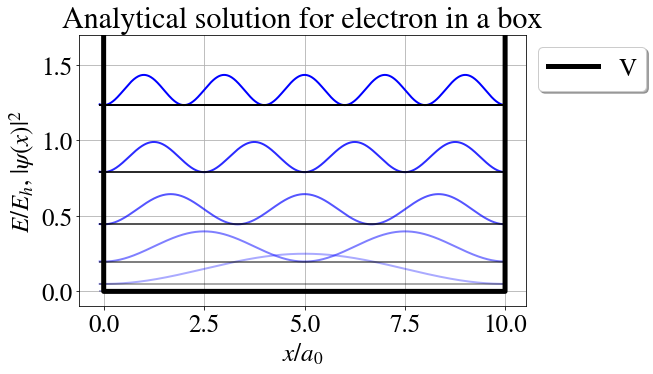

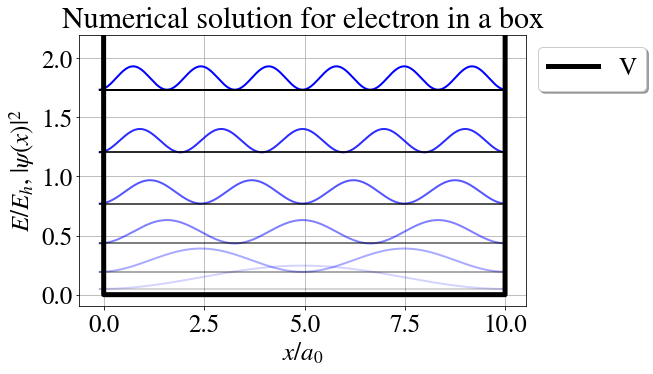

In [11]:
num = [0,1,2,3,4,5,6] #the n-th energy level (here I choose energy levels from 0 to 6.)

L=10; N = 1000; m = m_e #Length of the box, amount of iterations and mass of electron

x,dx = np.linspace(-0.1, L, N, retstep = True) #Initializing x-values that will be used

np.delete(x,0); np.delete(dx,0) #Adding np.delete to avoid division by zero error

V = 0*x #Potential for particle in a box

E,psi = states(x, V, m) #Numerical solution

#Making a function that spits out the analytical wave and energyfunction shown as above in the text
def analytic(n,x):
    psi = []; E = []
    for i in n:
        psi.append(np.sqrt(2/L) * np.sin((i*np.pi*x) / L))
        E.append(i**2 * np.pi**2 * hbar**2 / (2*m*L**2))
    return psi, E

psi_a,E_a = analytic(num,x) #Making an analytical solution for comparison
V_infwell=np.piecewise(x, [x<0, ((x < L) & (x >= 0)), x >= L], [L, 0, L]) #The analytical potential

print('Error on E_0:', E[0] - E_a[0])
plot(num,psi_a,E_a, 'Analytical solution for electron in a box' ,V_infwell,x,[-0.1,1.7])
plot(num,psi,E,'Numerical solution for electron in a box', V_infwell,x,[-0.1,2.2])



We compare energy $E_n$ and energy eigenfunctions $\psi(x)$ for $n={1,2,3,4,5}$. The black lines represent the energy levels. The spread of the energy levels follows a pattern. We see that the energy levels increase quadratically by $n^2$ as in the analytical solution. This means that the spacing between the energies increases with the energy. The error for the first term is of the order of $10^{-2}$.

## Harmonic oscillator

Another standard quantum mechanical problem is the harmonic oscillator with
$$
V(x) = \frac{1}{2}m \omega^2 x^2,
\quad \psi(x) = \frac{1}{\sqrt{2^n n!}} \cdot \left(\frac{m \omega}{\pi \hbar}\right)^{1/4} \cdot \exp{\left(-\frac{m \omega x^2}{2 \hbar}\right)} \cdot H_n\left(\sqrt{\frac{m \omega}{\hbar}}x \right),
\quad E = \left(n+\frac{1}{2}\right)\hbar \omega,
\quad \quad n = 0, 1, 2, \ldots
$$
The functions $H_n(y)$ (with dimensionless $y$) are called [(physicist's) Hermite polynomials](https://en.wikipedia.org/wiki/Hermite_polynomials).
They are available in numerical libraries, but can also be calculated from the recursion relation
$$ H_n(x) = 2 x H_{n-1}(x) - 2 (n-1) H_{n-2}(x), \quad H_0(x) = 1, \quad H_1(x) = 2x$$

The harmonic oscillator is particularly interesting in two-particle systems, where a problem with, for example, two atoms of mass $m_1$ and $m_2$ in a diatomic molecule is reduced to an equivalent one-particle problem with *reduced mass* $m = m_1 m_2 / (m_1 + m_2 )$.
Together with the constant $\omega$, this forms a measure of a spring constant that describes the vibrational motion between the two atoms.

**Compare numerical and analytical values ​​for some energies and energy eigenfunctions in a harmonic oscillator graphically.** **How ​​is the spread in the energy levels?**

We see that the distance between the energy levels is constant. We can see this from the fact that $E = (n+1/2)\hbar \omega$ on the analytical solution and the plotted graph (the black lines). We see that $E_0 = 1/2 \hbar \omega$ should be 0.5 analytically, gets almost the same numerically. An error of the order of $10^{-5}$ for the first term.

Numerical E_0 =  0.4999874746488222
Analytic E_0 = 0.5
Error seems to be 1.252535117779452e-05


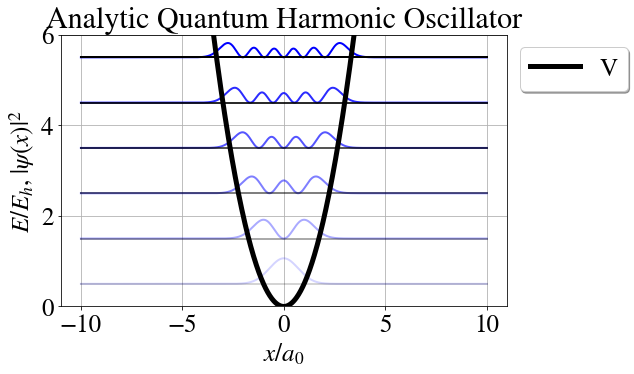

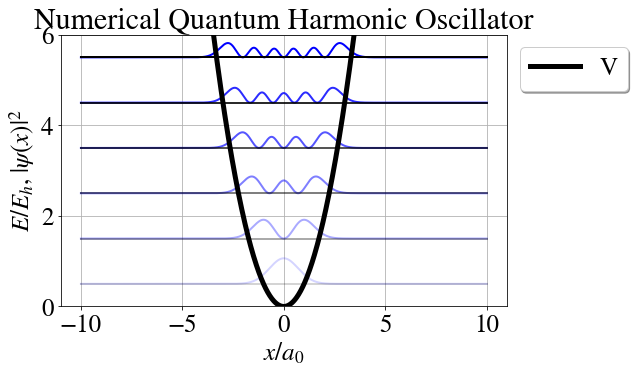

In [13]:
def hermite(x,n): #Recursionrule for the Hermite polynomial with if-statements as shown above
    
    if n==0:
        return 1 #zero-th polynomial
    elif n==1:
        return 2*x #first polynomial
    else:
        return 2*x*hermite(x,n-1)-2*(n-1)*hermite(x,n-2) #the n-th polynomial

#Making linear space of x-values for the solutions. Avoid division by zero.
x2, dx2= np.linspace(-L, L, N, retstep = True)
np.delete(x2, 0); np.delete(dx2, 0)

"Analytical solutions"

#Initializing lambda anonymous function
psi_HO = lambda n,x,H_n: 1/(np.sqrt(2**n*(np.math.factorial(n))))*((m*w)/(np.pi*hbar))**(1/4)*np.exp(-((m*w*x**2)/(2*hbar)))*H_n
E_HO = lambda n: (n+1/2)*hbar*w
w = 1; V_harmonic = (1/2) * m * (w**2) * (x2**2)
psi_harmonic=[]; E_harmonic=[] 
for i in num:
    psi_harmonic.append(psi_HO(i,x2,hermite(x2,i)))
    E_harmonic.append(E_HO(i))

E_ho, psi_ho = states(x2, V_harmonic, m) #numerical solution

#Checking differences for the first energy level.
print('Numerical E_0 = ', E_ho[0])
print('Analytic E_0 =', E_harmonic[0])
print('Error seems to be', E_harmonic[0] - E_ho[0])

#plotting and comparing
plot(num, psi_harmonic, E_harmonic,'Analytic Quantum Harmonic Oscillator', V_harmonic, x2, [0,6])
plot(num, psi_ho, E_ho, 'Numerical Quantum Harmonic Oscillator', V_harmonic, x2, [0,6])

## Particle in finite well potentials

A third well-known example is the single well
$$V(x) = \begin{cases}
-V_0 & \text{for}\,\, 0 < x < w \\
0 & \text{otherwise}
\end{cases}$$
with width $w$ and well depth $V_0 > 0$.
In this potential, there are no analytical solutions for the energy eigenvalues ​​of the bound stationary states.

The single well can be generalized to a potential consisting of $N_w$ such single wells placed next to each other with a fixed distance $g$ between each well.
With the first well in $x = 0$, we can express the composite well potential piecewise as

$$V(x) = \begin{cases}
0 & \text{for}\,\, x < 0 \,\, \text{and} \,\, x > N_w (w + g) & \text{(outside the well area)} \\
-V_0 & \text{for}\,\, \frac{x}{w+g} - \left\lfloor \frac{x}{w+g} \right\rfloor < \frac{w}{w+ g} & \text{(in the wells)} \\
0 & \text{otherwise} & \text{(between the wells)} \\
\end{cases}$$

This is a simple model for the periodic potential that an electron experiences in a solid with a regular crystalline structure, such as a metal.

**Produce the bound states for an electron both in a single well and in a composite potential consisting of many wells graphically. Enter a suitably large area with $V = 0$ on both sides of the well area.**

**How ​​are the energy levels distributed in the potential consisting of many wells compared to the single well? Based on this, can you explain what we mean by the *energy band structure* of a solid using the terms *band width* and *band gap*?**

**ANSWER:** We see that in a single well the energies will be distributed approximately the same as the particle in a box. If we create many wells, it will be different because then we will also see prohibited areas. It will not be found here. These forbidden regions can then be explained as the energy band structure of the solid.

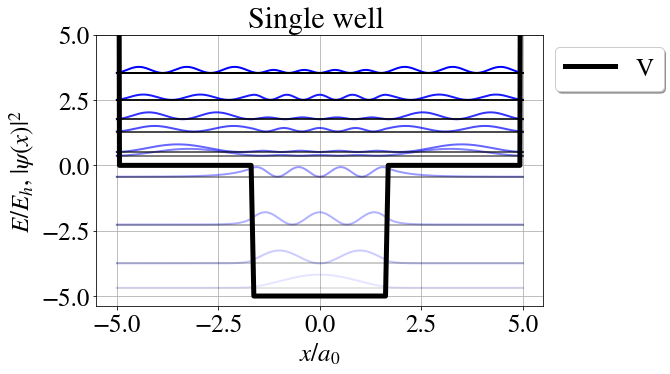

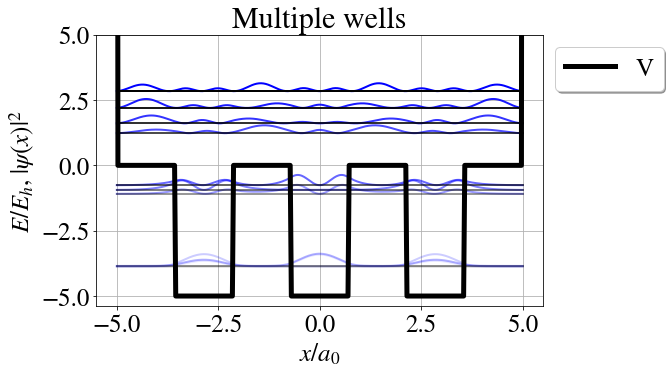

In [14]:
#New initialization
w = 1; V0 = 5; N=50 #w= width, V0 = initial potential, N = iterations

#Making wells by clever list addition
V_finwell = [N] + [0]*w*N + [-V0]*N + [0]*w*N + [N]
V_3well = [N] + [0]*w*N + [-V0]*N + [0]*w*N + [-V0]*N + [0]*w*N + [-V0]*N + [0]*w*N + [N] 

#Making different linear spaces for the wells to get sufficient enough datapoints
x, dx = np.linspace(-V0, V0, len(V_3well), retstep=True)
x1, dx1 = np.linspace(-V0, V0, len(V_finwell), retstep=True)

E_3, psi_3 = states(x, V_3well, m)
E_well, psi_well = states(x1,V_finwell,m)

#Checking for ten different energy levels
num=[0,1,2,3,4,5,6,7,8,9,10]

#Here we only have numerical solutions
plot(num, psi_well, E_well, 'Single well ', V_finwell, x1, [-V0-0.4,V0])
plot(num, psi_3, E_3, 'Multiple wells' , V_3well, x, [-V0-0.4,V0])

